### Concrete case study END to END using Pipeline


* datset link  - https://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength

Attribute Information:

Given are the variable name, variable type, the measurement unit and a brief description. 
The concrete compressive strength is the regression problem. 
The order of this listing corresponds to the order of numerals along the rows of the database.

 * Name --                   Data Type -- Measurement -- Description

* Cement (component 1) --  quantitative -- kg in a m3 mixture -- Input Variable

* Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable

* Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable

* Water (component 4) --   quantitative -- kg in a m3 mixture -- Input Variable

* Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable

* Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable

* Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable

* Age --                   quantitative -- Day (1~365) -- Input Variable

* Concrete compressive strength -- quantitative -- MPa -- Output Variable

In [57]:
import os
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')


from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import PowerTransformer ,StandardScaler , PolynomialFeatures ,MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn import model_selection

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
demo = pd.read_excel("Concrete_Data.xls")
demo.head()

cement   slag  flyash  water  superplasticizer  coarseaggregate  \
0   540.0    0.0     0.0  162.0               2.5           1040.0   
1   540.0    0.0     0.0  162.0               2.5           1055.0   
2   332.5  142.5     0.0  228.0               0.0            932.0   
3   332.5  142.5     0.0  228.0               0.0            932.0   
4   198.6  132.4     0.0  192.0               0.0            978.4   

   fineaggregate  age      csMPa  
0          676.0   28  79.986111  
1          676.0   28  61.887366  
2          594.0  270  40.269535  
3          594.0  365  41.052780  
4          825.5  360  44.296075

In [4]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


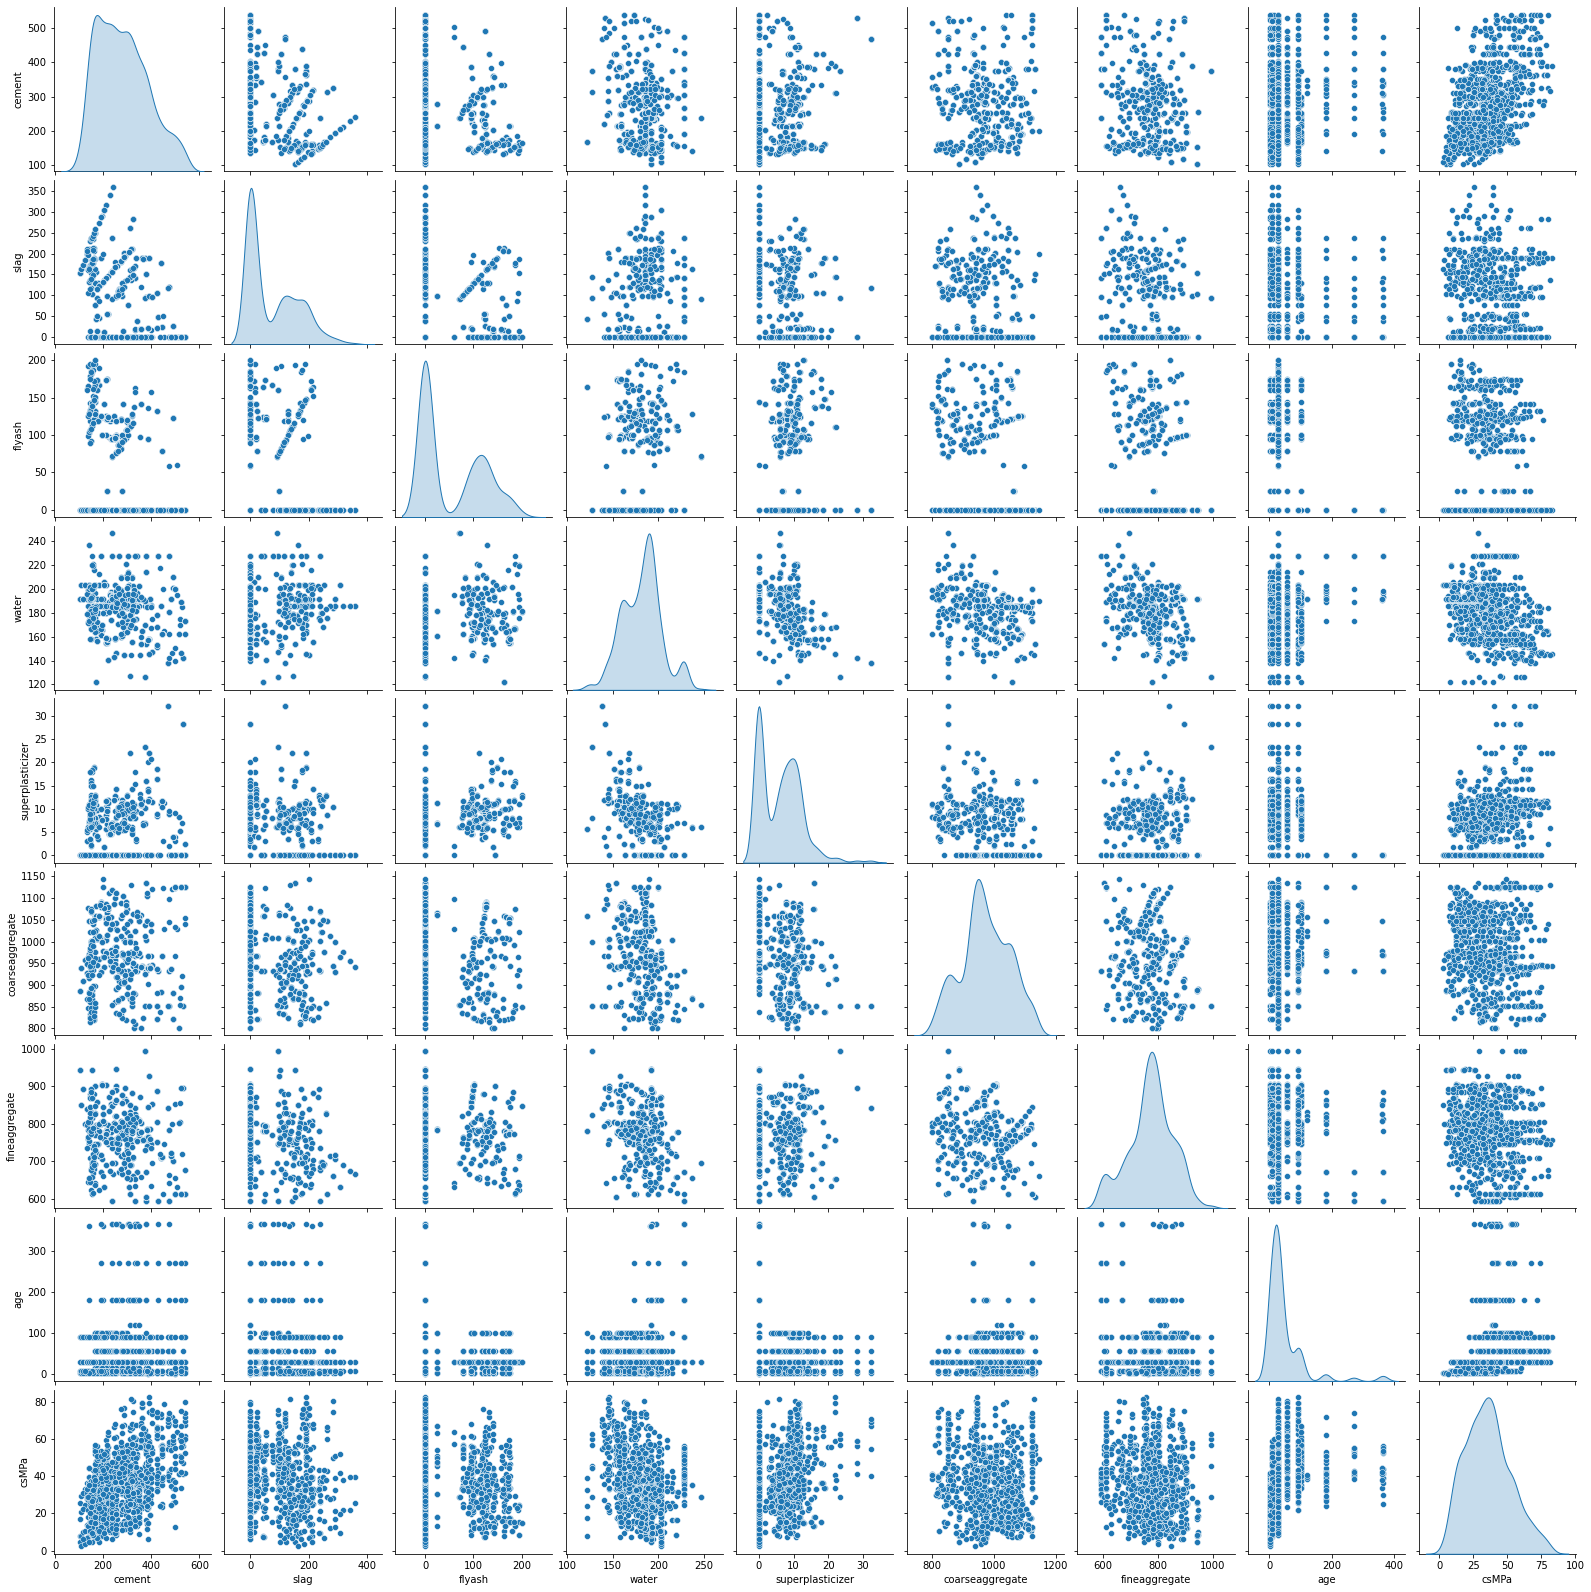

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(demo,diag_kind='kde')

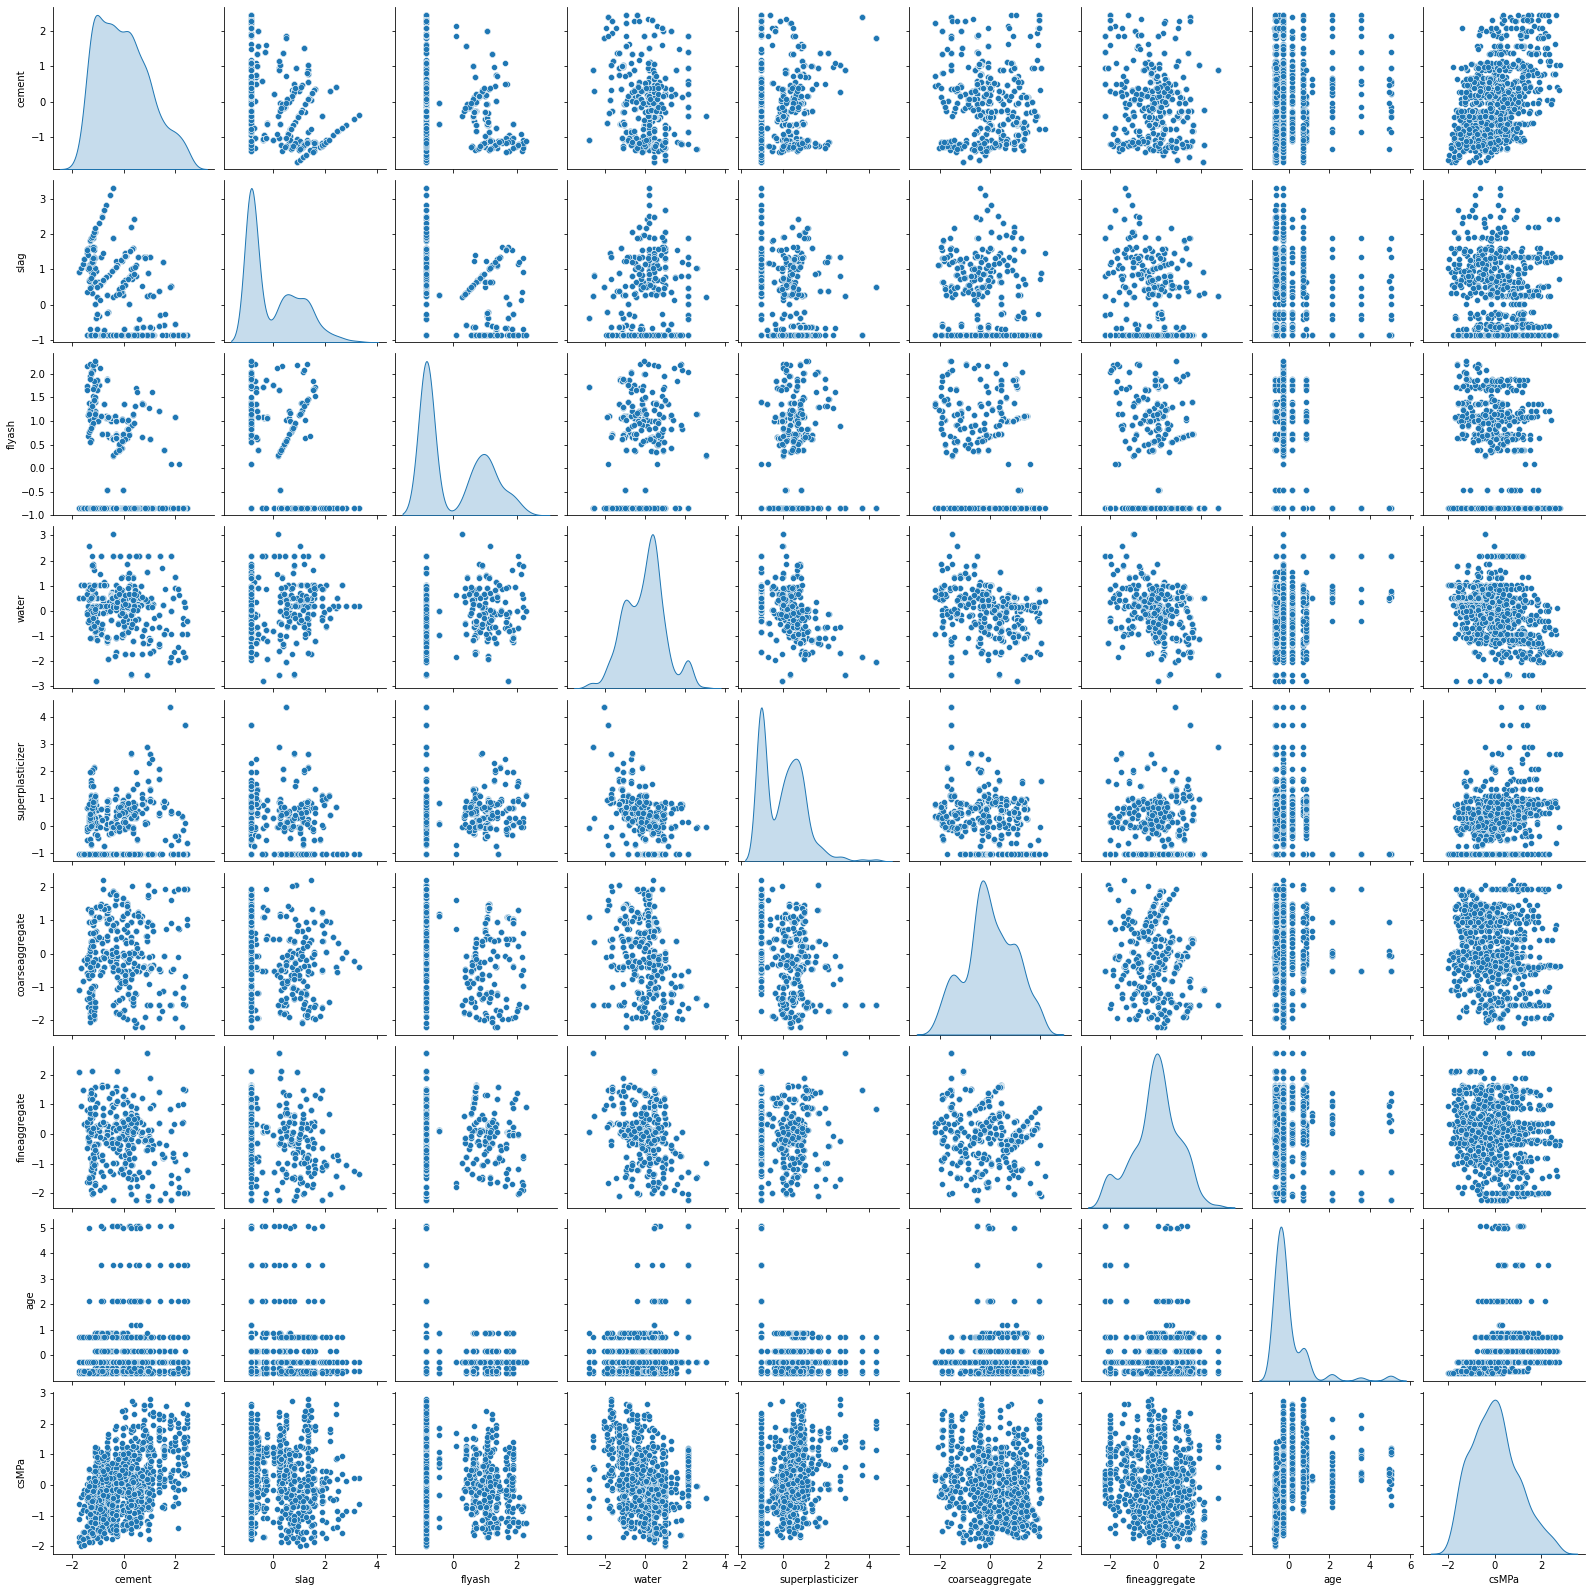

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaleddemo = pd.DataFrame(sc.fit_transform(demo))
scaleddemo.columns = demo.columns
sns.pairplot(scaleddemo,diag_kind='kde')

<AxesSubplot:ylabel='Density'>

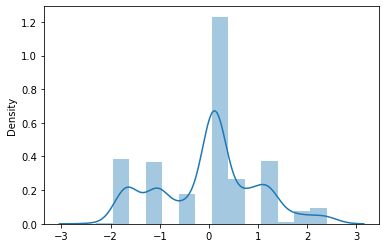

In [7]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
transformedage = pt.fit_transform(demo[['age']])
#sns.distplot(demo['age'])
sns.distplot(transformedage)

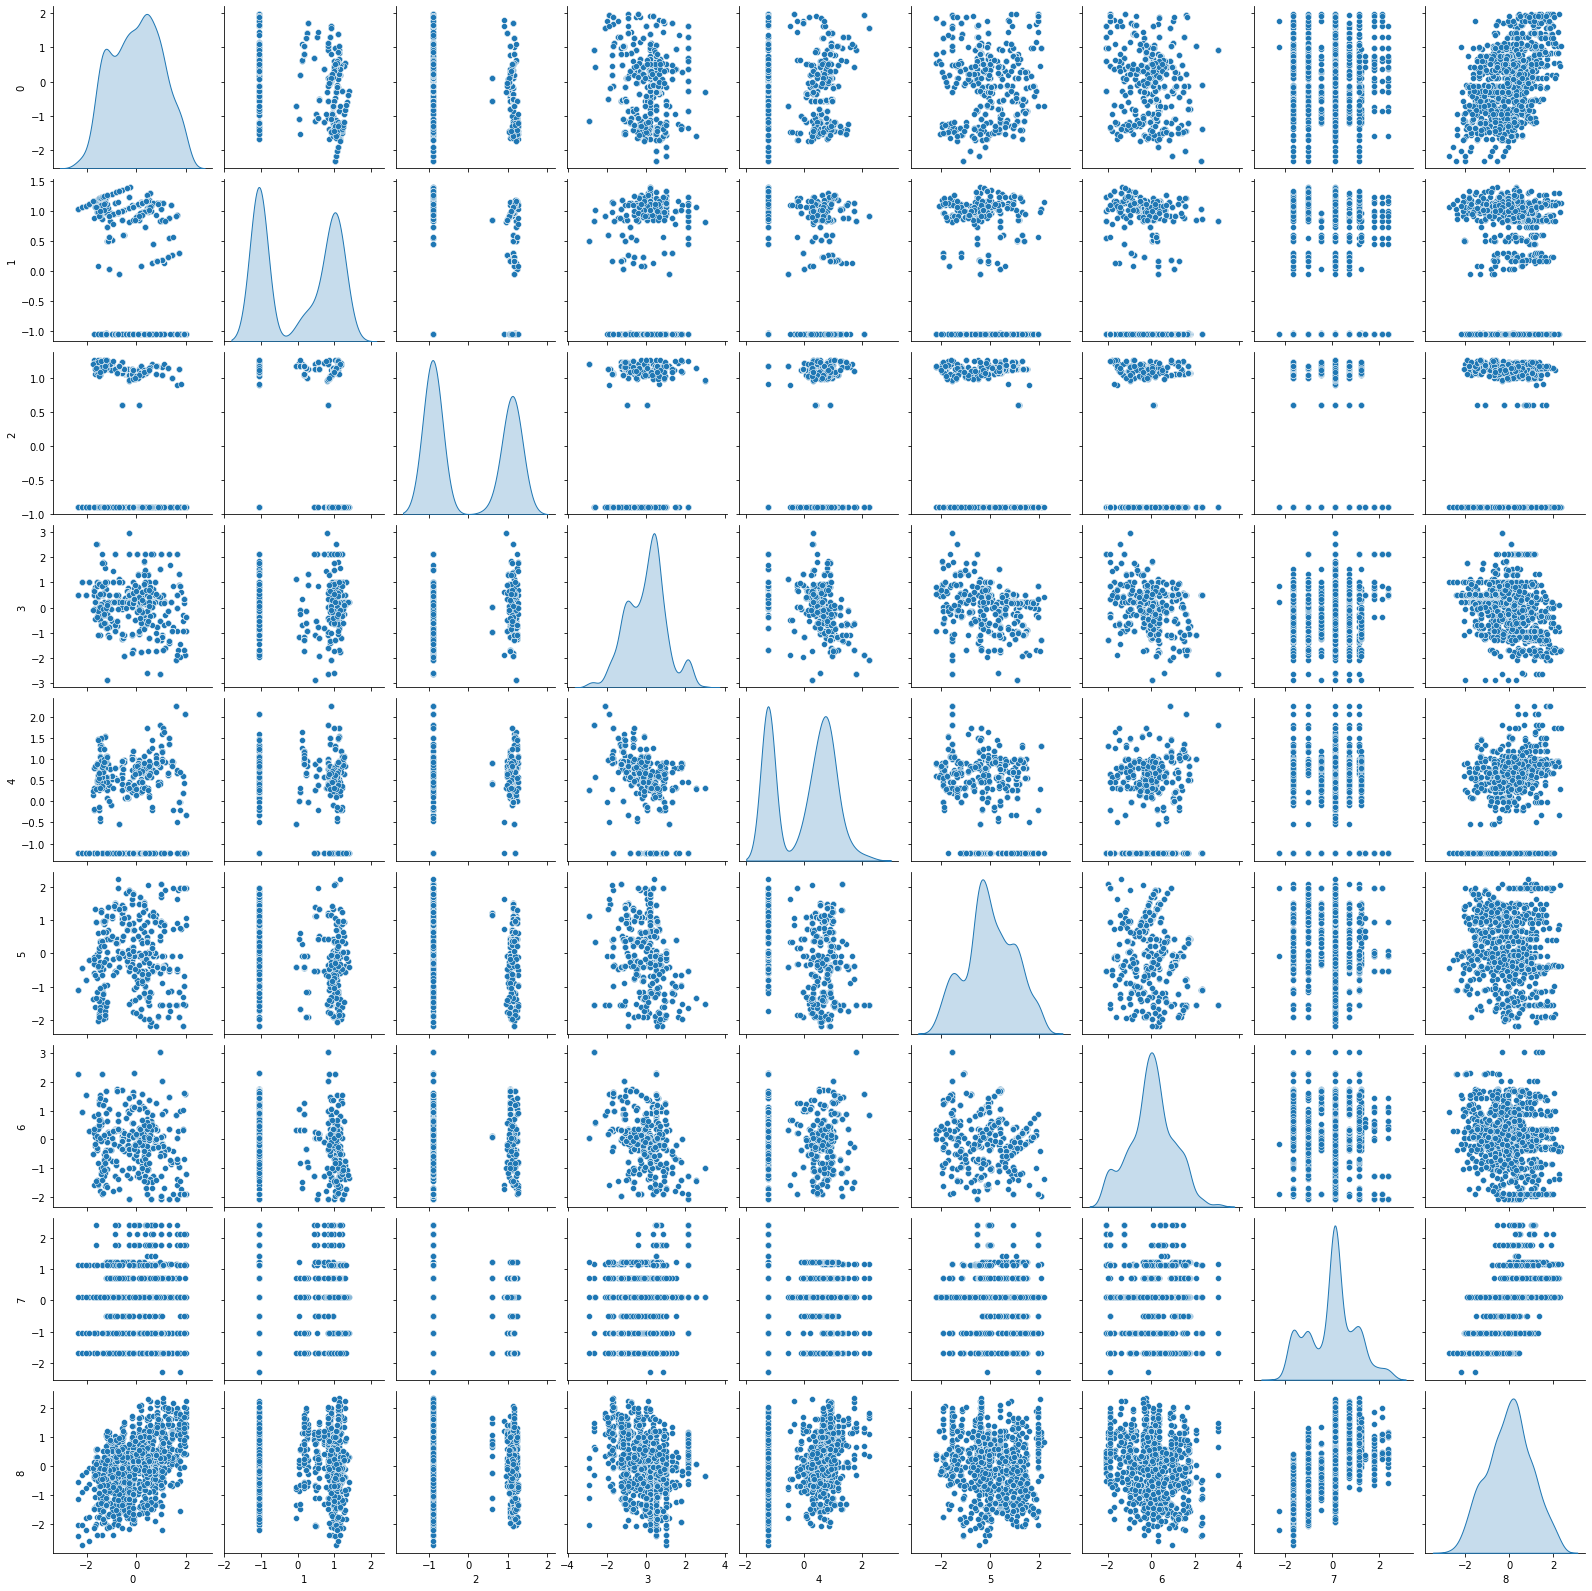

In [8]:
sns.pairplot(pd.DataFrame(pt.fit_transform(demo)),diag_kind='kde')

<AxesSubplot:>

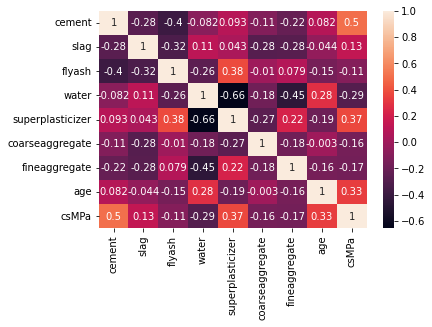

In [9]:
sns.heatmap(demo.corr(),annot=True)

In [10]:
import pandas as pd
from pandas_profiling import ProfileReport
design_report = ProfileReport(demo)
design_report.to_file(output_file='Pandas_profilingReport.html')

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
import sweetviz as sv
sweet_report = sv.analyze(demo)
sweet_report.show_html('sweet_report.html')

                                             |                                             | [  0%]   00:00 ->…

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Imported AutoViz_Class version: 0.0.84. Call using:
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 does not show plot but creates them and saves them in AutoViz_Plots directory in your local machine.
Shape of your Data Set loaded: (1030, 9)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  8
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
 

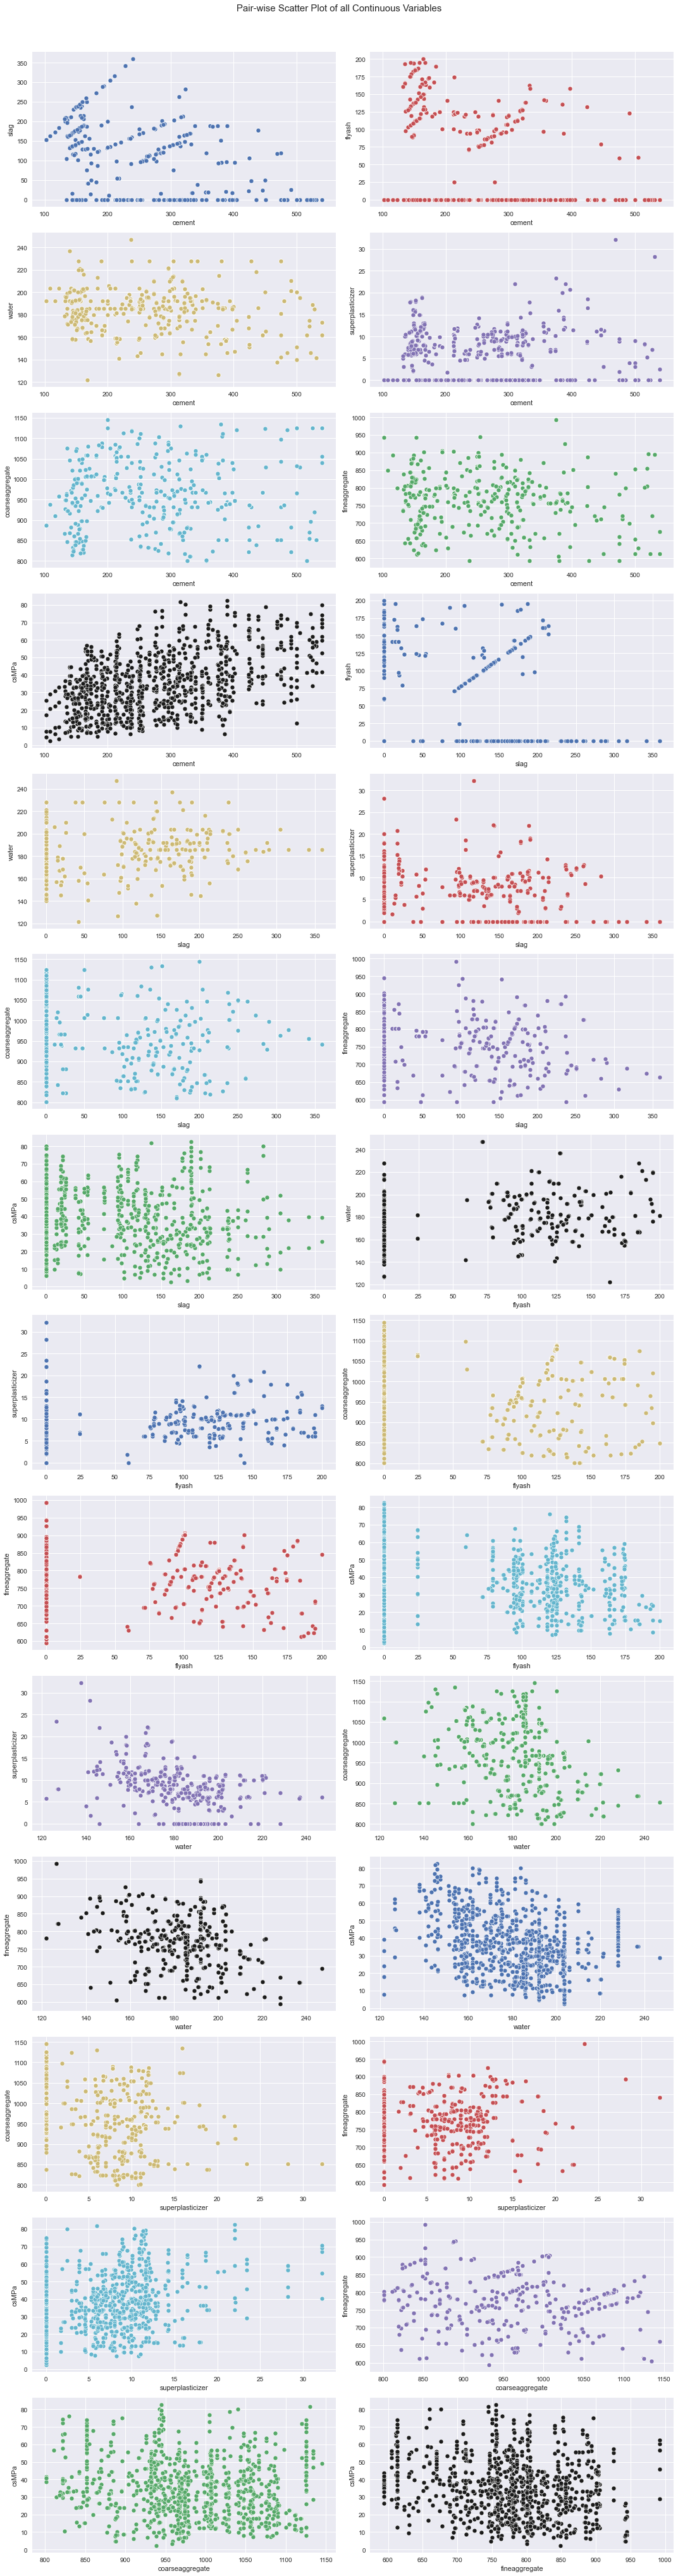

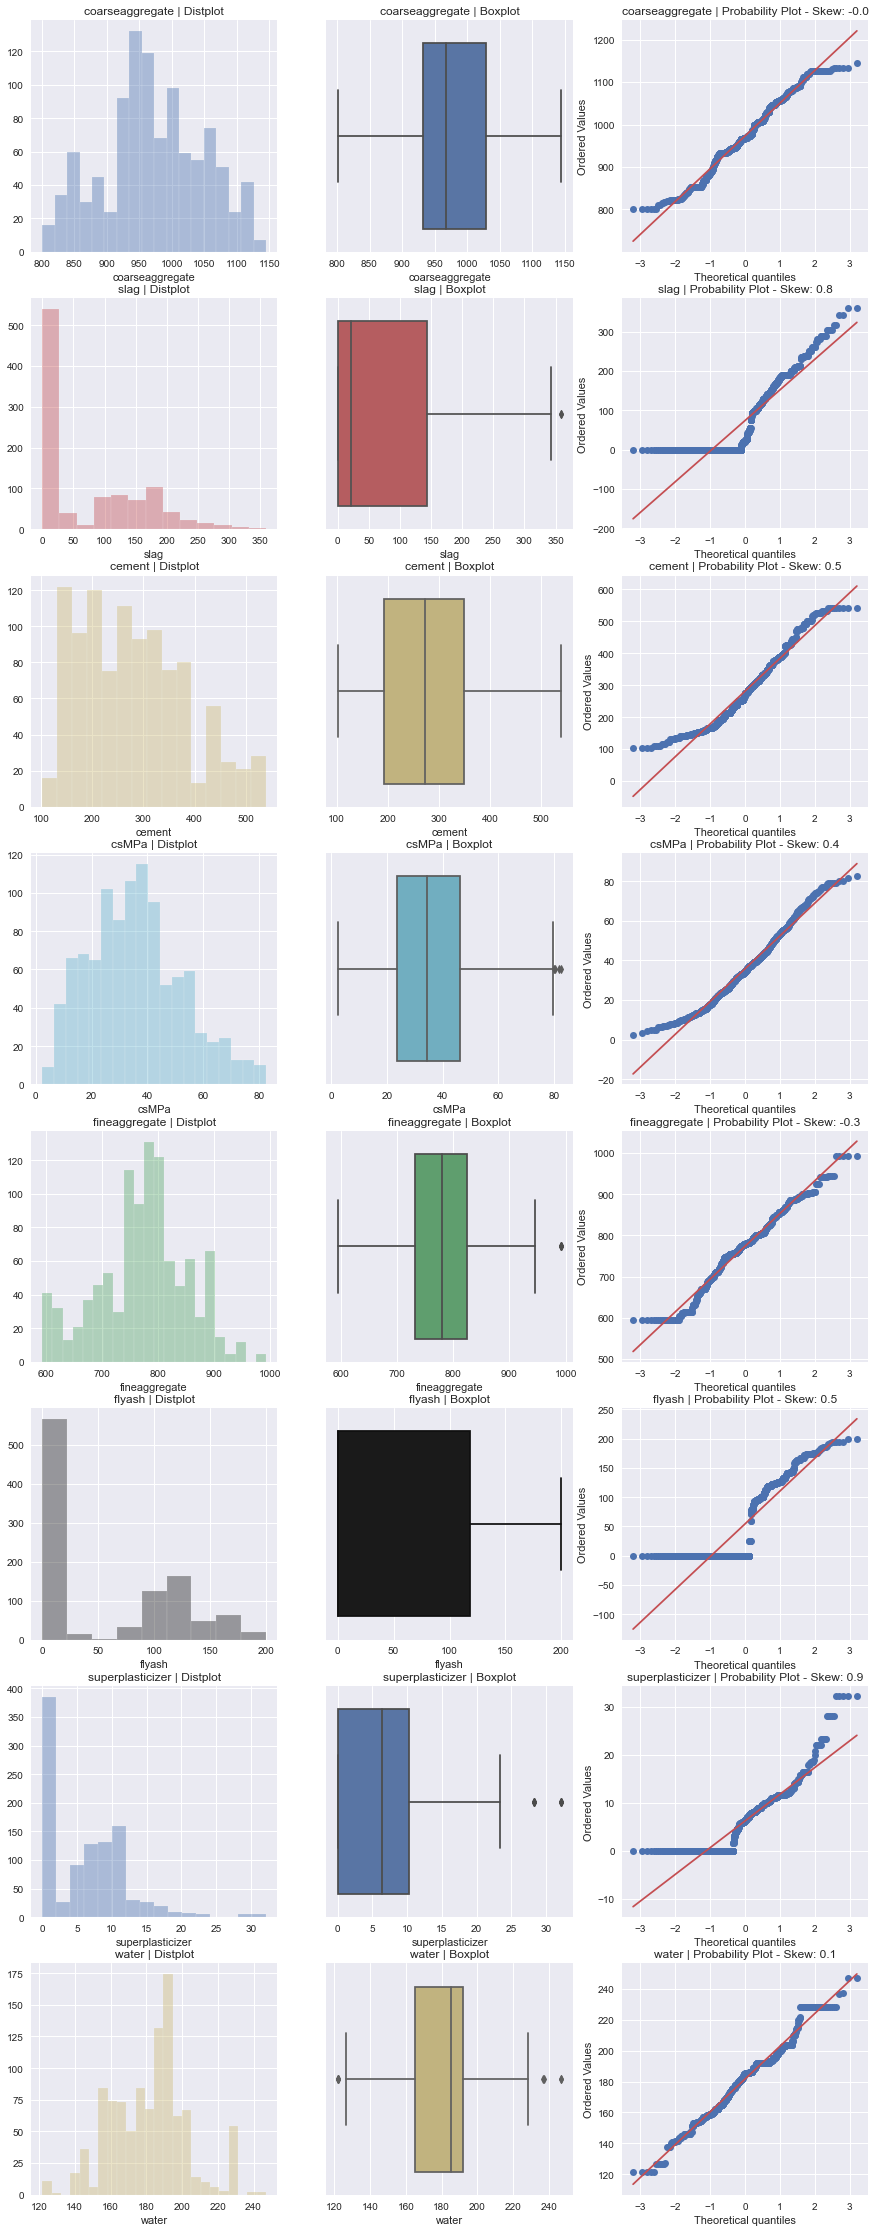

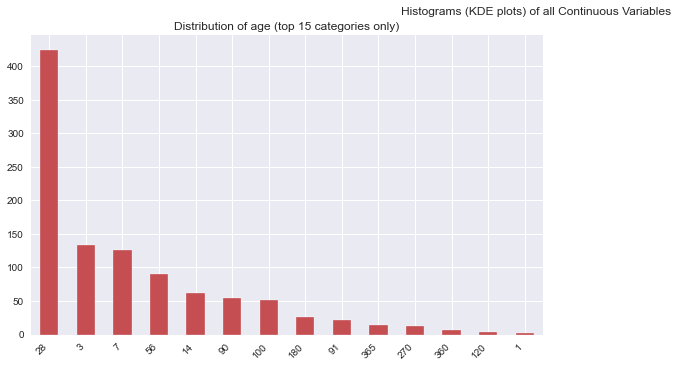

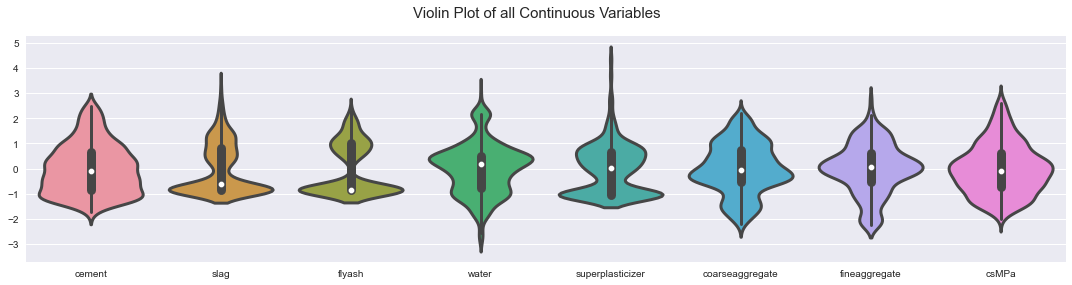

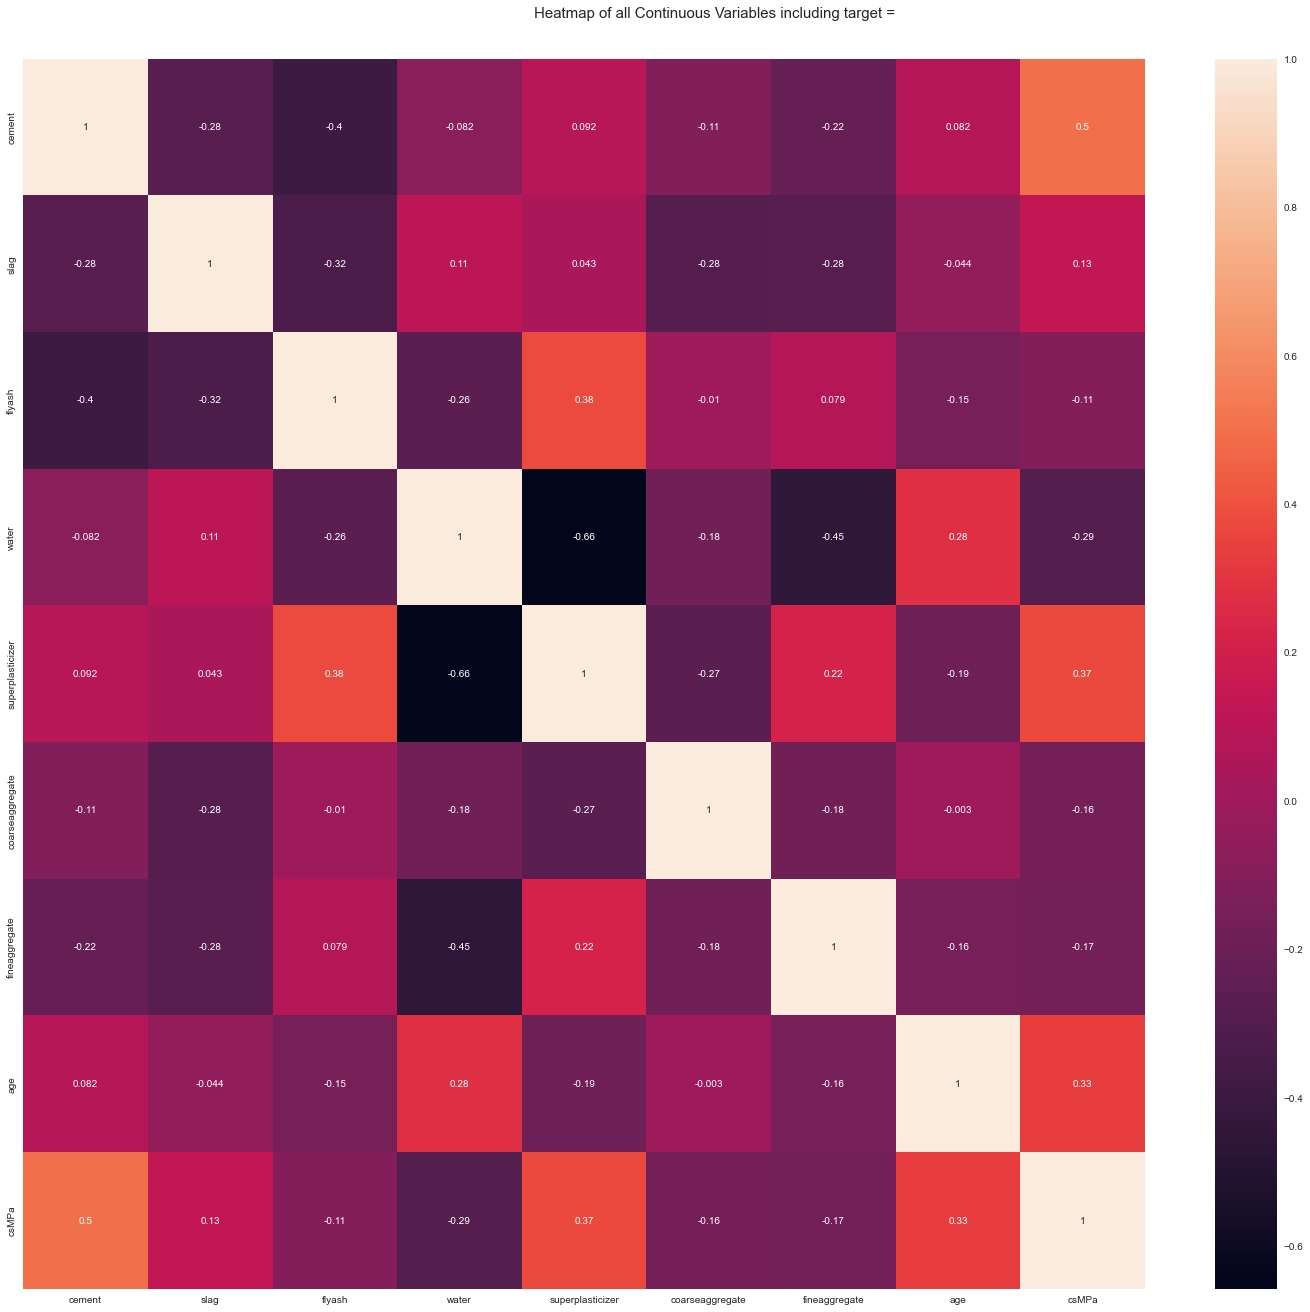

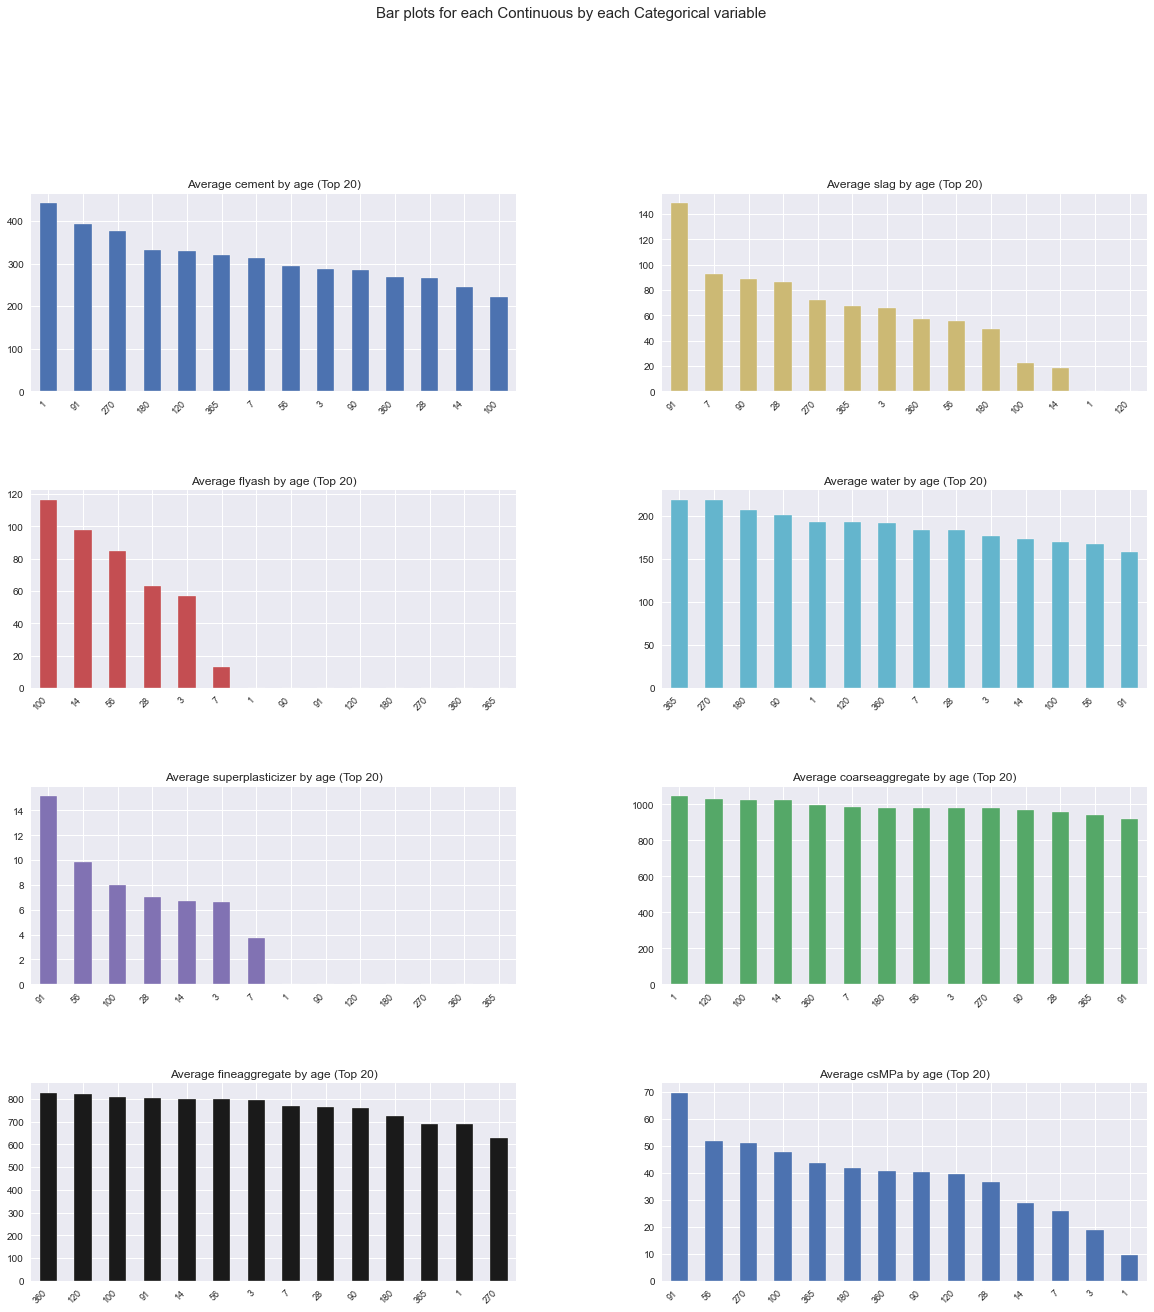

Time to run AutoViz (in seconds) = 25.415

 ###################### VISUALIZATION Completed ########################


In [12]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
df = AV.AutoViz('Concrete_Data_Yeh.csv')

In [13]:
import dtale
import pandas as pd
d = dtale.show(demo)
d.open_browser()

ModuleNotFoundError: No module named 'dtale'

In [17]:
#Basic Linear Regression Model

X=demo.drop('csMPa',axis=1)
#X=demo[['cement','age','water']]
y=demo[['csMPa']]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
lr = LinearRegression()
lr.fit(Xtrain,ytrain)
print("Training R2")
print(lr.score(Xtrain,ytrain))
print("Testing R2")
print(lr.score(Xtest,ytest))

Training R2
0.6210155777861788
Testing R2
0.5911291958486675


In [18]:
X.head()

cement   slag  flyash  water  superplasticizer  coarseaggregate  \
0   540.0    0.0     0.0  162.0               2.5           1040.0   
1   540.0    0.0     0.0  162.0               2.5           1055.0   
2   332.5  142.5     0.0  228.0               0.0            932.0   
3   332.5  142.5     0.0  228.0               0.0            932.0   
4   198.6  132.4     0.0  192.0               0.0            978.4   

   fineaggregate  age  
0          676.0   28  
1          676.0   28  
2          594.0  270  
3          594.0  365  
4          825.5  360

In [19]:
lr.coef_

array([[ 0.122247  ,  0.10549584,  0.092198  , -0.15249399,  0.25315015,
         0.02122665,  0.0219399 ,  0.11599229]])

In [20]:

X=demo.drop('csMPa',axis=1)
y=demo[['csMPa']]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
sc=StandardScaler()
scaledXtrain = sc.fit_transform(Xtrain)
scaledXtest = sc.transform(Xtest)
lr = LinearRegression()
lr.fit(scaledXtrain,ytrain)
print("Training R2")
print(lr.score(scaledXtrain,ytrain))
print("Testing R2")
print(lr.score(scaledXtest,ytest))

Training R2
0.6210155777861788
Testing R2
0.5911291958486673


In [21]:
lr.coef_

array([[12.88582155,  9.08236133,  5.95078108, -3.30290391,  1.5336928 ,
         1.64721357,  1.77857861,  7.35889329]])

In [22]:
#With Pipeline

X=demo.drop('csMPa',axis=1)
y=demo[['csMPa']]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
pipe = Pipeline((
("sc",StandardScaler()),
("lr", LinearRegression()),
))
pipe.fit(Xtrain,ytrain)
print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))
scoresdt = cross_val_score(pipe,Xtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))

Training R2
0.6210155777861788
Testing R2
0.5911291958486673
[0.71969891 0.55027101 0.62672294 0.35761793 0.60850172 0.6494172
 0.60724315 0.74941643 0.55853433 0.56766896]
Average R2
0.5995092574964728


In [23]:
pipe['lr'].coef_

array([[12.88582155,  9.08236133,  5.95078108, -3.30290391,  1.5336928 ,
         1.64721357,  1.77857861,  7.35889329]])

In [24]:
#With Pipeline

X=demo.drop('csMPa',axis=1)
y=demo[['csMPa']]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
pipe = Pipeline((
("pt",PowerTransformer()),
("lr", LinearRegression()),
))
pipe.fit(Xtrain,ytrain)
print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))
scoresdt = cross_val_score(pipe,Xtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))

Training R2
0.8080696398652527
Testing R2
0.7997468202444655
[0.82404397 0.82312287 0.77909676 0.67495537 0.78007746 0.76083307
 0.80282822 0.87637929 0.82496115 0.80596897]
Average R2
0.7952267144871339


In [25]:
#With Pipeline

X=demo.drop('csMPa',axis=1)
y=demo[['csMPa']]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
pipe = Pipeline((
("lr", DecisionTreeRegressor(max_depth=2)),
))
pipe.fit(Xtrain,ytrain)
print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))
scoresdt = cross_val_score(pipe,Xtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))

Training R2
0.47474195671983244
Testing R2
0.5187896655323243
[0.46265849 0.50217395 0.55841926 0.15306812 0.4789808  0.30900993
 0.46054321 0.5380555  0.47511851 0.52898591]
Average R2
0.44670136698005464


In [26]:
#Will regularisation help ?
#With Pipeline
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import Lasso,Ridge
X=demo.drop('csMPa',axis=1)
y=demo[['csMPa']]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
pipe = Pipeline((
("pt",PowerTransformer()),
("lr", Lasso(alpha=0)),
))
pipe.fit(Xtrain,ytrain)
print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))
scoresdt = cross_val_score(pipe,Xtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))

Training R2
0.8080696398652527
Testing R2
0.7997468202444655
[0.82404397 0.82312287 0.77909676 0.67495537 0.78007746 0.76083307
 0.80282822 0.87637929 0.82496115 0.80596897]
Average R2
0.7952267144871339


In [27]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import Lasso,Ridge
X=demo.drop('csMPa',axis=1)
y=demo[['csMPa']]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
pipe = Pipeline((
("pt", PowerTransformer()),
("poly",PolynomialFeatures(degree=2)),
("lr", LinearRegression())
))
pipe.fit(Xtrain,ytrain)
print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))
scoresdt = cross_val_score(pipe,Xtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))

Training R2
0.8862426307874122
Testing R2
0.869318207812694
[0.85972011 0.88590301 0.86088675 0.74332816 0.84914985 0.86869301
 0.85229826 0.93269096 0.8801278  0.84945361]
Average R2
0.8582251517897698


In [28]:
#With Pipeline

X=demo.drop('csMPa',axis=1)
y=demo[['csMPa']]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
pipe = Pipeline((
("pt",PowerTransformer()),
("poly",PolynomialFeatures(degree=3)),
("rfe",RFE(estimator=LinearRegression(),n_features_to_select=70)),
("lr", LinearRegression()),
))
pipe.fit(Xtrain,ytrain)
print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))
scoresdt = cross_val_score(pipe,Xtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))

Training R2
0.9297362818489873
Testing R2
0.9138006257097339
[0.87913082 0.86335477 0.87724788 0.80375829 0.89298666 0.92357526
 0.74631387 0.9409639  0.75946105 0.71311818]
Average R2
0.839991067941501


In [29]:
#With Pipeline

X=demo.drop('csMPa',axis=1)
y=demo[['csMPa']]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
pipe = Pipeline((
("pt",PowerTransformer()),
("poly",PolynomialFeatures(degree=3)),
("pca",PCA(n_components=100)),
("lr", LinearRegression()),
))
pipe.fit(Xtrain,ytrain)
print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))
scoresdt = cross_val_score(pipe,Xtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))
print()
print(pipe['pca'].explained_variance_ratio_)

Training R2
0.9128146561672463
Testing R2
0.8951308083295397
[0.88702647 0.88316744 0.84921279 0.72902285 0.91101502 0.87230665
 0.9157927  0.92882385 0.85977636 0.8249623 ]
Average R2
0.8661106435285915

[2.15273713e-01 1.09183874e-01 1.01943492e-01 5.92882852e-02
 5.55892024e-02 4.16392610e-02 2.98340535e-02 2.49321373e-02
 2.28308974e-02 2.03402792e-02 1.81975165e-02 1.66667573e-02
 1.57910870e-02 1.53224553e-02 1.37364593e-02 1.26455535e-02
 1.17073480e-02 1.11171470e-02 9.88011872e-03 9.48857193e-03
 9.27341177e-03 8.72076869e-03 8.20261483e-03 7.59086055e-03
 6.89944336e-03 6.49764856e-03 6.05846713e-03 5.78438932e-03
 5.60695596e-03 5.52891490e-03 5.24798636e-03 5.07016616e-03
 4.76533066e-03 4.48655970e-03 4.23656786e-03 4.14406011e-03
 3.88080350e-03 3.70527876e-03 3.58197652e-03 3.34382463e-03
 3.30821090e-03 3.09696970e-03 3.04282998e-03 2.88514289e-03
 2.75974025e-03 2.54133839e-03 2.53205346e-03 2.47868270e-03
 2.33092741e-03 2.19099769e-03 2.11188691e-03 2.03340661e-03
 1

In [30]:
#With Pipeline

X=demo.drop('csMPa',axis=1)
y=demo[['csMPa']]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
pipe = Pipeline((
#("pt",PowerTransformer()),
("lr", DecisionTreeRegressor(max_depth=20,random_state=10)),
))
pipe.fit(Xtrain,ytrain)
print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))
scoresdt = cross_val_score(pipe,Xtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))

Training R2
0.9967760262618252
Testing R2
0.9029714836672507
[0.848763   0.93025574 0.88297893 0.53762427 0.88186029 0.86867656
 0.82947029 0.88450929 0.81743712 0.78781308]
Average R2
0.8269388564806259


In [31]:
#With Pipeline

X=demo.drop('csMPa',axis=1)
y=demo[['csMPa']]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
pipe = Pipeline((
("lr", RandomForestRegressor(n_estimators=200,random_state=10)),
))
pipe.fit(Xtrain,ytrain)
print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))
scoresdt = cross_val_score(pipe,Xtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))

Training R2
0.9857247358368089
Testing R2
0.9214157221229847
[0.90397864 0.93232891 0.92092177 0.73786521 0.91722739 0.89968059
 0.90143926 0.9268386  0.91283868 0.90611272]
Average R2
0.8959231766961295


In [32]:
#With Pipeline

X=demo.drop('csMPa',axis=1)
y=demo[['csMPa']]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
pipe = Pipeline((
#("pt",PowerTransformer()),
("lr", GradientBoostingRegressor(n_estimators=1500,random_state=10)),
))
pipe.fit(Xtrain,ytrain)
print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))
scoresdt = cross_val_score(pipe,Xtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))

Training R2
0.9939888815336161
Testing R2
0.9406810833005682
[0.93365603 0.95424267 0.94267308 0.77653804 0.9338394  0.9594882
 0.95095975 0.96010662 0.93007089 0.90693765]
Average R2
0.9248512325109555


In [33]:
pipe['lr'].estimators_

array([[DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x14E8EFE9540)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x14E8EFE9540)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x14E8EFE9540)],
       ...,
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x14E8EFE9540)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x14E8EFE9540)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x14E8EFE9540)]],
      dtype=object)

In [34]:
tree1 = pipe['lr'].estimators_[1][0]
print(tree1)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      random_state=RandomState(MT19937) at 0x14E8EFE9540)


In [35]:
from sklearn.tree import export_graphviz
export_graphviz(tree1,out_file = 'tree.dot',feature_names=Xtrain.columns)

In [ ]:
!dot -Tpng tree.dot > tree.png # to convert the tree in a png image

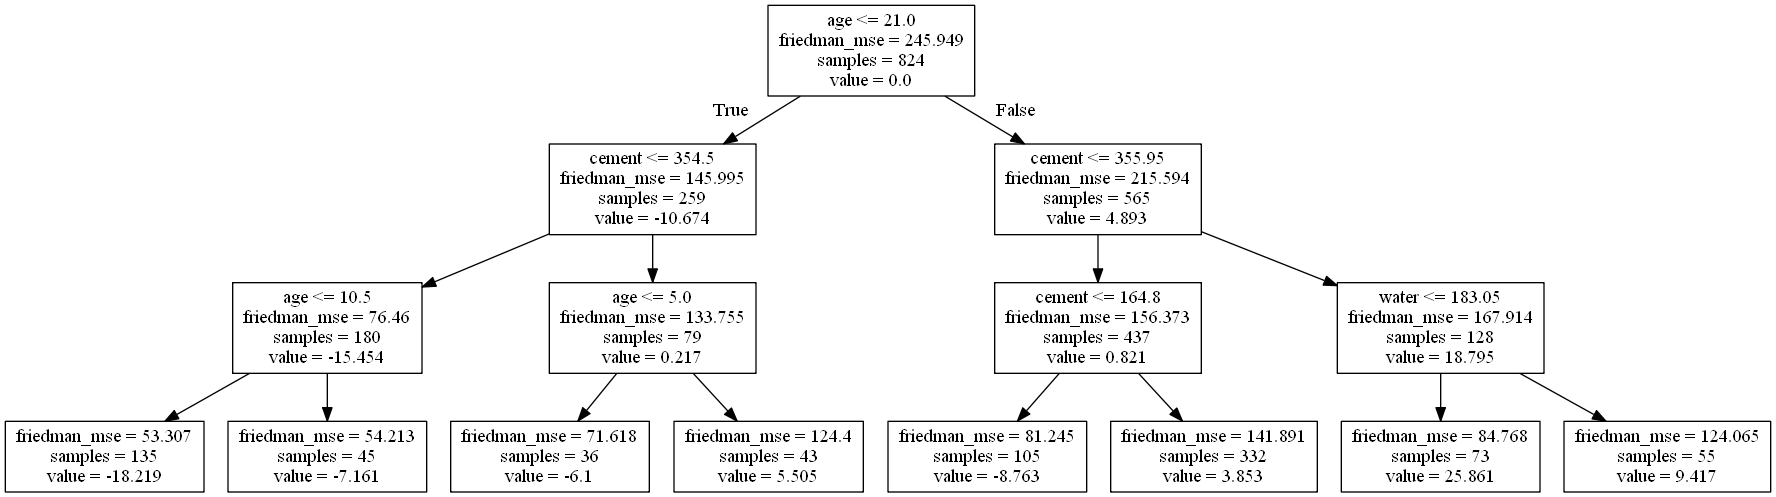

In [36]:
from IPython.display import Image
Image(filename='tree.png') 

In [37]:
#With Pipeline

X=demo.drop('csMPa',axis=1)
y=demo[['csMPa']]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
pipe = Pipeline((
#("pt",PowerTransformer()),
("lr", AdaBoostRegressor(n_estimators=10,base_estimator=LinearRegression(),random_state=10)),
))
pipe.fit(Xtrain,ytrain)
print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))
scoresdt = cross_val_score(pipe,Xtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))

Training R2
0.6139288773939189
Testing R2
0.5884881788468004
[0.70897417 0.56016104 0.60605082 0.393362   0.62044178 0.63561708
 0.61451974 0.72550871 0.55506276 0.5822175 ]
Average R2
0.6001915613342584


Automatically created module for IPython interactive environment


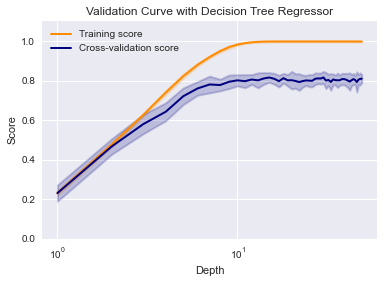

In [38]:
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve
param_range = np.arange(1,50)
train_scores, test_scores = validation_curve(
    DecisionTreeRegressor(), Xtrain, ytrain, param_name="max_depth", param_range=param_range,n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Decision Tree Regressor")
plt.xlabel("Depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

Automatically created module for IPython interactive environment


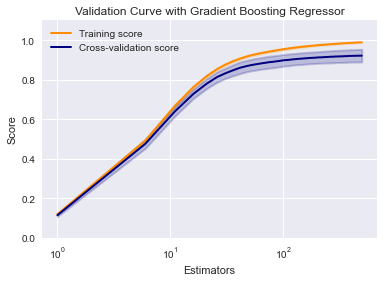

In [39]:
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve




param_range = np.arange(1,500,5)
train_scores, test_scores = validation_curve(
    GradientBoostingRegressor(), Xtrain, ytrain, param_name="n_estimators", param_range=param_range,n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Gradient Boosting Regressor")
plt.xlabel("Estimators")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [40]:
#Hyperparameter Tuning with Pipeline

pipe = Pipeline((
("pt",PowerTransformer()),
("poly",PolynomialFeatures()),
("rfe",RFE(estimator=LinearRegression())),
("lr", LinearRegression()),
))
param_grid = {
    'poly__degree' : [1,2,3],
    'rfe__n_features_to_select' : [10,20,30,40,50,60,70,80,90,100]
}
search = GridSearchCV(pipe,param_grid,cv=5)
search.fit(Xtrain,ytrain)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=(('pt', PowerTransformer()),
                                       ('poly', PolynomialFeatures()),
                                       ('rfe',
                                        RFE(estimator=LinearRegression())),
                                       ('lr', LinearRegression()))),
             param_grid={'poly__degree': [1, 2, 3],
                         'rfe__n_features_to_select': [10, 20, 30, 40, 50, 60,
                                                       70, 80, 90, 100]})

In [41]:
search.best_params_

{'poly__degree': 2, 'rfe__n_features_to_select': 50}

In [42]:
#Performance on the CV set
search.best_score_

0.8614499992057809

In [43]:
#Performance on the test set
search.score(Xtest,ytest)

0.869318207812694

In [44]:
search.cv_results_

{'mean_fit_time': array([0.06250749, 0.0562006 , 0.04611931, 0.06493115, 0.05920048,
        0.05780025, 0.05848141, 0.05688944, 0.06036468, 0.05624895,
        0.12019858, 0.12665572, 0.08437657, 0.06562495, 0.05949545,
        0.05416117, 0.06680675, 0.0562428 , 0.07036014, 0.0638577 ,
        0.97686667, 1.13382936, 1.44639144, 1.0981101 , 1.11023302,
        0.80739102, 0.94786453, 0.87870202, 0.80179391, 0.64841857]),
 'std_fit_time': array([0.0066257 , 0.00213498, 0.00150376, 0.01030521, 0.00146975,
        0.00803695, 0.01528673, 0.00826111, 0.01402469, 0.00765682,
        0.01014093, 0.0238729 , 0.01250088, 0.01168893, 0.02125212,
        0.00568776, 0.0173325 , 0.01250713, 0.01017353, 0.01574898,
        0.02229774, 0.05243943, 0.37527582, 0.14853475, 0.31894297,
        0.03490507, 0.21130199, 0.14104886, 0.16067857, 0.01286108]),
 'mean_score_time': array([0.00760107, 0.00659943, 0.00312567, 0.00579667, 0.00579939,
        0.00640092, 0.0101253 , 0.00937586, 0.00872626, 0.00

In [46]:
#With Pipeline (Transformation Pipeline Only, model separate)

pipe = Pipeline((
("sc",StandardScaler()),
("pt",PowerTransformer()) ,
("poly",PolynomialFeatures(degree=1)),
("pca",PCA())
))
preparedtrain = pipe.fit_transform(Xtrain)
preparedtest = pipe.transform(Xtest)
lr=LinearRegression()
scoresdt = cross_val_score(lr,preparedtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))
print("SD of accuracy")
print(np.std(scoresdt))
print("Coefficient of Variation")
print(np.std(scoresdt)/np.mean(scoresdt))

[0.83754101 0.82836509 0.77248447 0.67934514 0.78216011 0.79976155
 0.80454204 0.88403516 0.82199041 0.83545983]
Average R2
0.8045684802113282
SD of accuracy
0.05144096456431647
Coefficient of Variation
0.06393609224015956


In [48]:
#With Pipeline (Transformation Pipeline Only, model separate)
pipe = Pipeline((
("sc",StandardScaler()),
("pt",PowerTransformer()) ,
("poly",PolynomialFeatures(degree=1)),
("pca",PCA())
))
preparedtrain = pipe.fit_transform(Xtrain)
preparedtest = pipe.transform(Xtest)
lr=DecisionTreeRegressor()
scoresdt = cross_val_score(lr,preparedtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))
print("SD of accuracy")
print(np.std(scoresdt))
print("Coefficient of Variation")
print(np.std(scoresdt)/np.mean(scoresdt))

[0.74741486 0.78414859 0.84003611 0.38703388 0.75427245 0.79165555
 0.61898002 0.82389011 0.78395457 0.80347919]
Average R2
0.7334865323337751
SD of accuracy
0.12910814182775712
Coefficient of Variation
0.176019785144475


In [50]:

#With Pipeline (Transformation Pipeline Only, model separate)
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA

pipe = Pipeline((
("sc",StandardScaler()),
("pt",PowerTransformer()) ,
("poly",PolynomialFeatures(degree=1)),
("pca",PCA())
))
preparedtrain = pipe.fit_transform(Xtrain)
preparedtest = pipe.transform(Xtest)
lr=GradientBoostingRegressor(n_estimators=1500)
scoresdt = cross_val_score(lr,preparedtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))
print("SD of accuracy")
print(np.std(scoresdt))
print("Coefficient of Variation")
print(np.std(scoresdt)/np.mean(scoresdt))

[0.93553197 0.9222275  0.89755661 0.72259054 0.88490979 0.90780232
 0.88560542 0.91916152 0.8868111  0.89795539]
Average R2
0.886015216304952
SD of accuracy
0.0568524526916205
Coefficient of Variation
0.06416645182316238


In [62]:
#Hyperparameter Tuning with Pipeline

pipe = Pipeline((
("sc",StandardScaler()),
("pt",PowerTransformer(standardize = False)),
("poly",PolynomialFeatures()),
("pca",PCA()),
("xb",GradientBoostingRegressor())
))
param_grid = {
    'poly__degree' : [2,3],
    'pca__n_components' : [30,40],
    'xb__n_estimators' : [10,20,30,40,50]
}
search = GridSearchCV(pipe,param_grid,cv=5)
search.fit(Xtrain,ytrain)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=(('sc', StandardScaler()),
                                       ('pt',
                                        PowerTransformer(standardize=False)),
                                       ('poly', PolynomialFeatures()),
                                       ('pca', PCA()),
                                       ('xb', GradientBoostingRegressor()))),
             param_grid={'pca__n_components': [30, 40], 'poly__degree': [2, 3],
                         'xb__n_estimators': [10, 20, 30, 40, 50]})

In [63]:
search.best_params_

{'pca__n_components': 40, 'poly__degree': 3, 'xb__n_estimators': 50}

In [64]:
#Performance on the CV set
search.best_score_

0.8035427807404298

In [65]:
#Performance on the test set
search.score(Xtest,ytest)

0.7922812253183276

In [66]:
search.cv_results_

{'mean_fit_time': array([0.11155605, 0.15523286, 0.24062266, 0.28125138, 0.32289834,
        0.11562204, 0.21826091, 0.24246564, 0.29294467, 0.35933466,
        0.13699794, 0.20481176, 0.29726086, 0.34051733, 0.4436451 ,
        0.13124366, 0.24001765, 0.29106555, 0.35624986, 0.4125001 ]),
 'std_fit_time': array([0.01681251, 0.01305266, 0.02898131, 0.01397441, 0.01834846,
        0.00765318, 0.03717402, 0.03329374, 0.01706151, 0.02997658,
        0.00429043, 0.02075254, 0.02689042, 0.02292206, 0.04583729,
        0.00765448, 0.03306133, 0.01564932, 0.01822563, 0.01875136]),
 'mean_score_time': array([0.00937567, 0.0062501 , 0.00312591, 0.        , 0.00937629,
        0.00937858, 0.00579643, 0.00885229, 0.00752759, 0.00652814,
        0.008002  , 0.00765305, 0.0063262 , 0.00937881, 0.00593247,
        0.00312743, 0.01012902, 0.01217785, 0.        , 0.00937943]),
 'std_score_time': array([0.0076552 , 0.00765477, 0.00625181, 0.        , 0.00765571,
        0.00765758, 0.00764708, 0.007291

In [69]:
#Confidence Interval Of the Accuracy
import scipy.stats as stats
#With Pipeline (Transformation Pipeline Only, model separate)

pipe = Pipeline((
("sc",StandardScaler()),
("pt",PowerTransformer()),
("poly",PolynomialFeatures(degree=1)),
("pca",PCA()),
("lr", GradientBoostingRegressor())
))
scoresdt = cross_val_score(pipe,Xtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))
print("SD of accuracy")
print(np.std(scoresdt))
#Confidence Interval
xbar = np.mean(scoresdt)
n=10
s=np.std(scoresdt,ddof=1)
se=s/np.sqrt(n)
stats.t.interval(0.95,df=9,loc=xbar,scale=se)

[0.90308213 0.89202915 0.81942978 0.75806546 0.87223237 0.89787089
 0.85408482 0.90729972 0.87068281 0.8702963 ]
Average R2
0.8645073434220352
SD of accuracy
0.04334926884619606


(0.8318197237486994, 0.897194963095371)

In [71]:
import warnings
warnings.filterwarnings('ignore')
#Model Comparison
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn import model_selection
X=demo.drop('csMPa',axis=1)
y=demo[['csMPa']]
lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor(n_estimators=1000)
gb = GradientBoostingRegressor(n_estimators=1500)
ab = AdaBoostRegressor(n_estimators=1500)
models = []
models.append(('Linear Regression',lr))
models.append(('Decision Tree Regression',dt))
models.append(('Random Forest Regression',rf))
models.append(('Gradient Boosting Regression',gb))
models.append(('Gradient Boosting Regression',ab))

Linear Regression: 0.607872 (0.101940)
Decision Tree Regression: 0.866098 (0.094828)
Random Forest Regression: 0.914763 (0.053487)
Gradient Boosting Regression: 0.938058 (0.051796)
Gradient Boosting Regression: 0.743990 (0.041197)


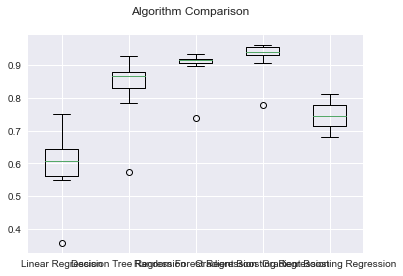

In [72]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, Xtrain, ytrain, cv=kfold)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.median(cv_results), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [73]:
results

[array([0.71969891, 0.55027101, 0.62672294, 0.35761793, 0.60850172,
        0.6494172 , 0.60724315, 0.74941643, 0.55853433, 0.56766896]),
 array([0.86387186, 0.92654815, 0.8764999 , 0.57326359, 0.87969009,
        0.86832415, 0.82300436, 0.90029106, 0.84976207, 0.78253825]),
 array([0.90823978, 0.9328402 , 0.91980742, 0.73981387, 0.91556511,
        0.89735346, 0.90356213, 0.92649294, 0.91766512, 0.91396161]),
 array([0.93340384, 0.95441421, 0.94216468, 0.7766701 , 0.93395076,
        0.95971991, 0.95072242, 0.96004709, 0.93054033, 0.90521945]),
 array([0.79471899, 0.71339669, 0.77551812, 0.70647184, 0.7805525 ,
        0.71427388, 0.73023358, 0.81167991, 0.68116077, 0.7577458 ])]

In [74]:
print(np.median(results[2]))
print(np.std(results[2]))

0.9147633602921693
0.0534865643147058


<AxesSubplot:>

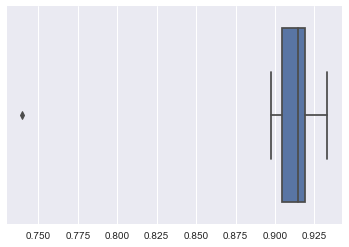

In [75]:
#Random Forest Regression box plot  ( best fit)
sns.boxplot(results[2])